![Titanic ship](https://www.englishclub.com/efl/wp-content/uploads/2020/04/titanic.png)

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualizing
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# Introduction

sdgfdsafjkgl;fdlsfgkkls;dfgxcjfkdslfghmk;ffg,



<a class="anchor" id="0.1"></a>

## Table of Contents

1. [Import data and cleaning](#1)
1. [EDA](#3)
1. [Preparing to modeling](#4)
1. [Tuning models](#5)
    -  [Linear Regression](#5.1)
    -  [Support Vector Machines](#5.2)
    -  [Linear SVR](#5.3)
    -  [MLPRegressor](#5.4)
    -  [Stochastic Gradient Descent](#5.5)
    -  [Decision Tree Regressor](#5.6)
    -  [Random Forest with GridSearchCV](#5.7)
    -  [XGB](#5.8)
    -  [LGBM](#5.9)
    -  [GradientBoostingRegressor with HyperOpt](#5.10)
    -  [RidgeRegressor](#5.11)
    -  [BaggingRegressor](#5.12)
    -  [ExtraTreesRegressor](#5.13)
    -  [AdaBoost Regressor](#5.14)
    -  [VotingRegressor](#5.15)
1. [Models comparison](#6)
1. [Prediction](#7)

# 1. Import data and cleaning

## Dataset explanation

Dataset is provided by Kaggle as a part of "Titanic: Machine Learning from Disaster" competition. The goal of this model is to predict whether given passenger will survive the disaster or not based on following features.

1. Survival	: 0 = No, 1 = Yes
1. name     : Passenger name including prefix
1. pclass	: A proxy for socio-economic status (SES) 1 = 1st, 2 = 2nd, 3 = 3rd
1. Sex	    : Male / Female
1. Age	    : Age in years	(Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5)
1. sibsp	: # of siblings / spouses aboard the Titanic	
1. parch	: # of parents / children aboard the Titanic	
1. ticket	: Ticket number	
1. fare	    : Passenger fare	
1. cabin	: Cabin number	
1. embarked	: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
#Read data
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

#Storing Passenger Id for submision
Id = test.PassengerId

In [5]:
#Train set example
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Test set example
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
print('Train set shape = ' + str(train.shape[0]) +' Rows, ' + str(train.shape[1]) + ' Columns')
print('Test set shape = ' + str(test.shape[0]) +' Rows, ' + str(test.shape[1]) + ' Columns')

#Test set has 1 columns less than Train set (Survived columns (predictions) is unknown)

Train set shape = 891 Rows, 12 Columns
Test set shape = 418 Rows, 11 Columns


In [9]:
#Let's look at brief summary of train set
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

From above outline : Several attribute need to be checked as they contain some missing value
1. Age
2. Cabin
3. Embarked

# 2.Exploratory Data Analysis

## Univariate analysis

In [38]:
cat_col = ['Pclass','Sex','Embarked']
num_col = ['Age','SibSp','Parch','Fare']


Note that we keep out Name, Ticket and Cabin attribute for later since at first glance they might seem to be unique but I think that after preprocessing them we might see some pattern in it.

In [24]:
train[num_col].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


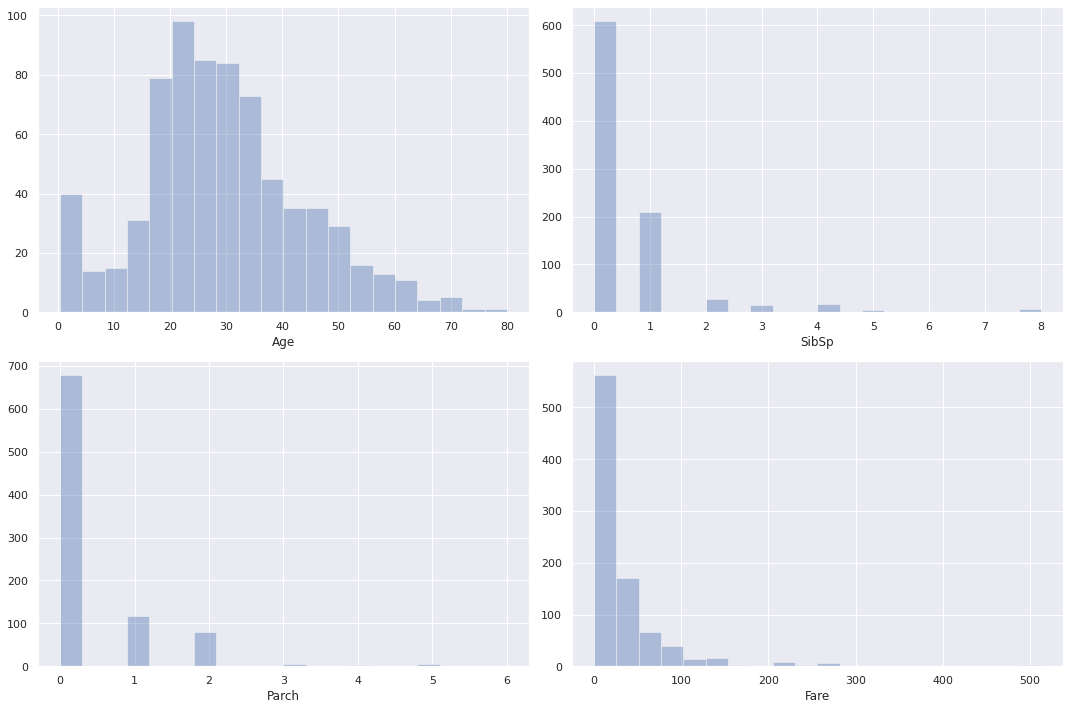

In [63]:
#numerical data
fig = plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
for index,col in enumerate(num_col):
    plt.subplot(2,2,index+1)
    sns.set(font_scale = 1.0)
    sns.distplot(train[col],kde=False, bins = 20)
fig.tight_layout(pad=1.0)

Data observation
* Age : Traveller on board Titanic have wide range of age from infants to old person with mean and median around 28-30 years old
* SibSp and Parch : show that most of passengers were not travelling with their family (low # of SibSp and Parch) since friend, mistresses and fiancés were ignored. We can not conclude that passengers were travelling alone
* Fare : ticket fare were widely spread with mean of 32 and median just about 15


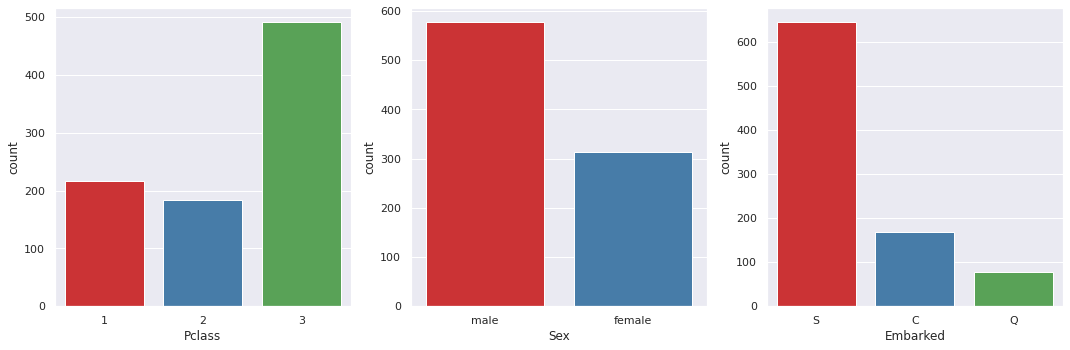

In [64]:
#Categorical columns
fig = plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
for index,col in enumerate(cat_col):
    plt.subplot(1,3,index+1)
    sns.set(font_scale = 1.0)
    sns.countplot(train[col], palette='Set1')
fig.tight_layout(pad=1.0)

Data observation :
* Most passenger were from class 3 
* There were more male than female onboard
* Most of passenger embarked at Southampton port following by Cherbourg and Queenstown

## Bivariate analysis

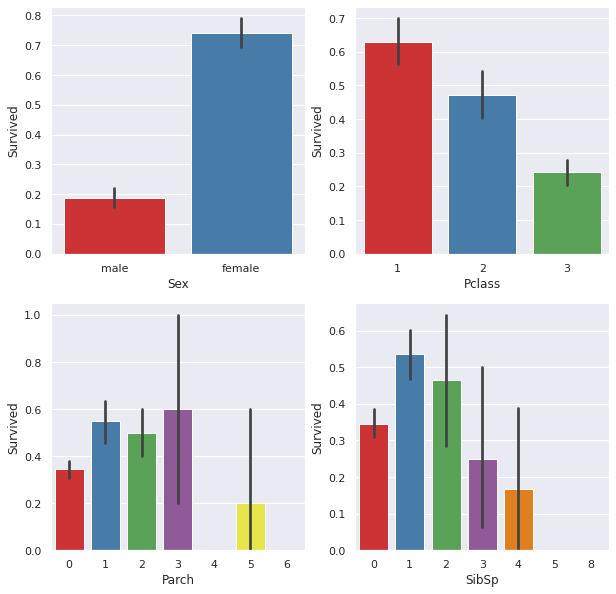

In [77]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot(x="Sex", y="Survived", data=train, palette = 'Set1')
plt.subplot(2,2,2)
sns.barplot(x="Pclass", y="Survived", data=train, palette = 'Set1')
plt.subplot(2,2,3)
sns.barplot(x="Parch", y="Survived", data=train, palette = 'Set1')
plt.subplot(2,2,4)
sns.barplot(x="SibSp", y="Survived", data=train, palette = 'Set1')

# 3.Data preprocessing

First,
let's combine train and test set into single dataframe for preprocessing purpose. After preprocessing we'll split it into train and test set again.

In [ ]:
df = pd.concat([train,test],sort=False,ignore_index=True)
df.head()

In [ ]:
#Check amount of missing values by columns
df.isnull().mean().sort_values(ascending=False)

* Columns 'Cabin' has more than 77% missing so we'll drop out this columns from our consideration
* Columns 'Survived' is missed because our test set has no information about it.
* Columns 'Age' is missing about 20%. But they're imputable, so we dicide to keep it for further processing
* Columns 'Embarked' and 'Fare' almost perfect (missing less than 1%). We'll keep these columns for further processing

## 3.1 Embarked feature processing

In [ ]:
df['Embarked'].value_counts()

In [ ]:
df['Embarked'].value_counts()
print('S = ' + str((df['Embarked'].value_counts().S/df['Embarked'].value_counts().sum()*100).round(2))+"%")
print('C = ' + str((df['Embarked'].value_counts().C/df['Embarked'].value_counts().sum()*100).round(2))+"%")
print('Q = ' + str((df['Embarked'].value_counts().Q/df['Embarked'].value_counts().sum()*100).round(2))+"%")

Almost 70% of passenger are embarked in S. Therefore, we'll fill missing values with 'S'

In [ ]:
df['Embarked'] = df['Embarked'].fillna('S')

## 3.2 Fare feature processing

In [ ]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

## 3.3 Title feature processing
We also found something interesting. In columns 'Name' There is title embedded inside. so we'll try to extract some information from this also


In [ ]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
df['Title'].unique().tolist()

Some of the titles above are quite unfamiliar, so we decide to replace these titles with more familiar titles which organizes our categories. After replacing these titles we only end up with 5 distinct titles.

In [ ]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

df['Title'] = df['Title'].map(title_mapping)

# Imputing missing values with 0
df['Title'] = df['Title'].fillna(0)

## 3.4 Age feature processing

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

## 3.5 Drop unnecessary features

In [ ]:
df.drop(columns = ['Name','Ticket','Cabin'], inplace = True)

In [ ]:
df.head()

## 3.6 Label Encoding categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [ ]:
for col in ['Sex','Embarked']:
    df[col] = label.fit_transform(df[col])

In [ ]:
df.head()

## 3.7 Split dataset back to train and test set

In [ ]:
train = df[:len(train)]
test = df[len(train):]

In [ ]:
train.tail()

In [ ]:
test.drop(columns = ['Survived'], inplace = True)

In [ ]:
test.head()

# 4.Modelling

## 4.1 Split train into training and developing set

In [ ]:
train_feature = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title']

In [ ]:
X = train[train_feature]
y = train['Survived']
y=np.ravel(y) #convert pd.series to np.array

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_dev,y_train,y_dev = train_test_split(X,y, test_size = 0.2, random_state = 1)

Scaling input features

In [ ]:
def scaling(X_train,X_dev):
    from sklearn.preprocessing import StandardScaler
    X_train_scaled = X_train.copy()
    col_names = ['Age','Fare']
    features_train = X_train_scaled[col_names]
    scaler = StandardScaler().fit(features_train.values) # must be train set
    features_train = scaler.transform(features_train.values) #selectable set
    X_train_scaled[col_names] = features_train
    
    X_dev_scaled = X_dev.copy()
    features_dev = X_dev_scaled[col_names]
    features_dev = scaler.transform(features_dev.values)
    X_dev_scaled[col_names] = features_dev

    return X_train_scaled,X_dev_scaled


In [ ]:
X_train_scaled,X_dev_scaled = scaling(X_train,X_dev)

## 4.2 Create model

In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from keras.optimizers import Adam
# from keras.utils import to_categorical

In [ ]:
# define classification model
def classification_model(learning_rate=0.01,node_number=50,dropout_rate=0.25,activation='relu'):
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=learning_rate)
    
    # create model
    model = Sequential()
    model.add(Dense(8, activation='relu', input_shape=(8,)))
    model.add(Dense(node_number, activation=activation))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(node_number, activation=activation))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(node_number, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    
    
    # compile model
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create a KerasClassifier
model = KerasRegressor(build_fn = classification_model,
                       verbose = 0)

# Define the parameters to try out
params = {'activation': ["relu", "tanh"],
          'batch_size': [16, 32, 64, 128], 
          'epochs': [50, 100, 150, 200, 300],
          'learning_rate': [0.01, 0.001, 0.0001],
          'node_number': [20,50,75,100],
          'dropout_rate': [0.1,0.25,0.5]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model,
                                   param_distributions = params,
                                   cv = KFold(10))

random_search_results = random_search.fit(X_train_scaled, y_train)

In [ ]:
# Print best score and parameters
print("Best Score: ", random_search_results.best_score_, "and Best Params: ", random_search_results.best_params_)


## 4.3 Model training on best parameters

In [ ]:
model = classification_model(learning_rate=random_search_results.best_params_['learning_rate'],
                            node_number=random_search_results.best_params_['node_number'],
                            dropout_rate=random_search_results.best_params_['dropout_rate'],
                            activation = random_search_results.best_params_['activation'])

history = model.fit(X_train_scaled,y_train, validation_data = (X_dev_scaled,y_dev), epochs = random_search_results.best_params_['epochs'], batch_size = random_search_results.best_params_['batch_size'])

scores = model.evaluate(X_dev_scaled,y_dev)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test = df[len(train):]

In [ ]:
X_test = test[train_feature]

In [ ]:
X_test_scaled , X_test_scaled2 = scaling(X_test,X_test)

In [ ]:
prediction = model.predict(X_test_scaled)

In [ ]:
yhat = prediction.round().astype(int)

In [ ]:
result = []

In [ ]:
for i in yhat:
    result.append(i[0])

In [ ]:
result = pd.Series(result)

In [ ]:
output = pd.DataFrame({'PassengerId': Id, 'Survived': result})
output.to_csv('submission.csv', index=False)

In [ ]:
output.head()